In [5]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import math
import seaborn as sns
import matplotlib.image as mpimg

In [2]:
#!unzip "datasets/mammography_images.zip"

Archive:  datasets/mammography_images.zip
   creating: mammography_images/
  inflating: mammography_images/sample_submission.csv  
   creating: mammography_images/test/
  inflating: mammography_images/test/Image_1.jpg  
  inflating: mammography_images/test/Image_10.jpg  
  inflating: mammography_images/test/Image_100.jpg  
  inflating: mammography_images/test/Image_1000.jpg  
  inflating: mammography_images/test/Image_1001.jpg  
  inflating: mammography_images/test/Image_1002.jpg  
  inflating: mammography_images/test/Image_1003.jpg  
  inflating: mammography_images/test/Image_1004.jpg  
  inflating: mammography_images/test/Image_1005.jpg  
  inflating: mammography_images/test/Image_1006.jpg  
  inflating: mammography_images/test/Image_1007.jpg  
  inflating: mammography_images/test/Image_1008.jpg  
  inflating: mammography_images/test/Image_1009.jpg  
  inflating: mammography_images/test/Image_101.jpg  
  inflating: mammography_images/test/Image_1010.jpg  
  inflating: mammography_ima

In [6]:
train = pd.read_csv('mammography_images/Training_set.csv')
test = pd.read_csv('mammography_images/Testing_set.csv')

In [4]:
train.head()

,filename,label
0,Image_1.jpg,Density3Benign
1,Image_2.jpg,Density1Benign
2,Image_3.jpg,Density1Malignant
3,Image_4.jpg,Density1Benign
4,Image_5.jpg,Density1Malignant


In [4]:
print(f'Training set size:{len(train)}')
print(f'Training set size:{len(test)}')

Training set size:5724
Training set size:1908


In [5]:
#First of all, let's see if there are any null values:
print(f'Number of Null values:\n{train.isnull().sum()}')
#Fortunately, this dataset has been optimized before so there are not.
print('Value counts:')
train['label'].value_counts()
#We have 8 categories: 4 types of density and two types of result (benign or malignant)

Number of Null values:
filename    0
label       0
dtype: int64
Value counts:


label
Density2Malignant    1728
Density1Malignant    1620
Density3Benign        702
Density1Benign        648
Density3Malignant     432
Density4Benign        324
Density2Benign        216
Density4Malignant      54
Name: count, dtype: int64

Text(0, 0.5, 'Number of train examples')

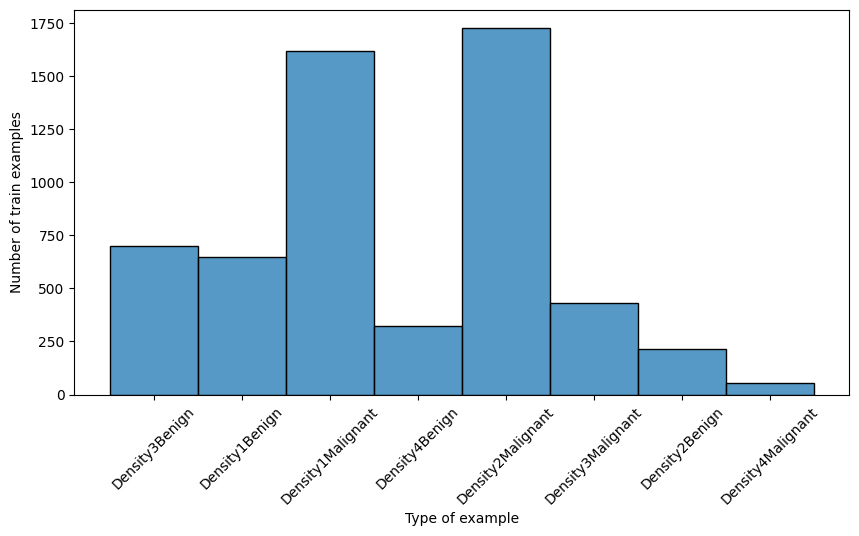

In [6]:
plt.figure(1,figsize=(10,5))
sns.histplot(x = train['label'],data=train)
plt.xlabel('Type of example')
plt.xticks(rotation = 45)
plt.ylabel('Number of train examples')

We can easily see that the two most common examples in our training set are Density1 and Density2 Malignant tumors.

Recall that the Density value goes from (1); which is low density to (4) which means high density; and that the higher the density the more porbable it is for the woman to get breast cancer. This two examples have an increased importance in the training set as they may represent the situations where it is more difficult to detect them. 

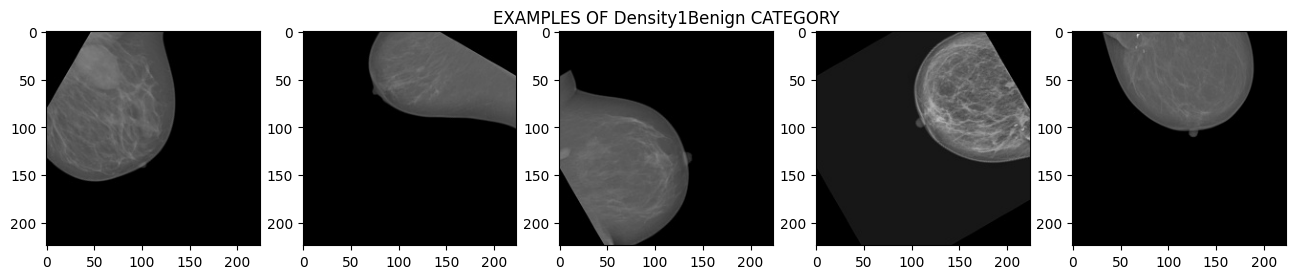

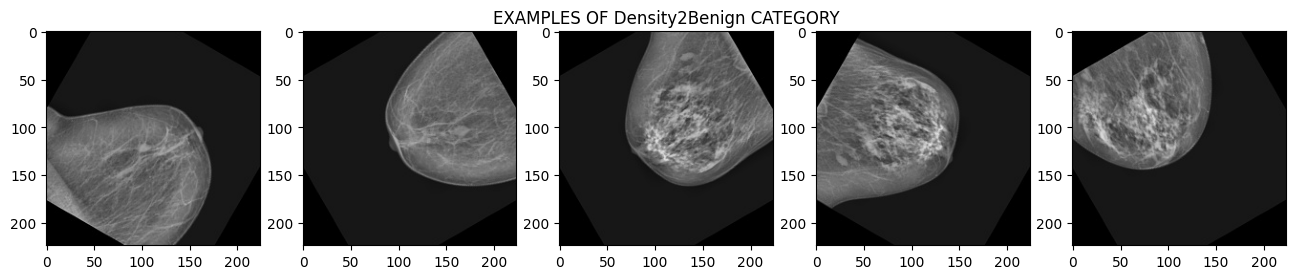

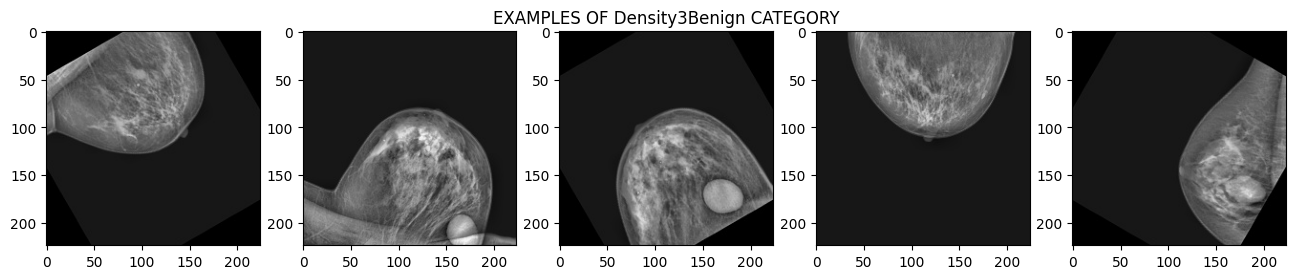

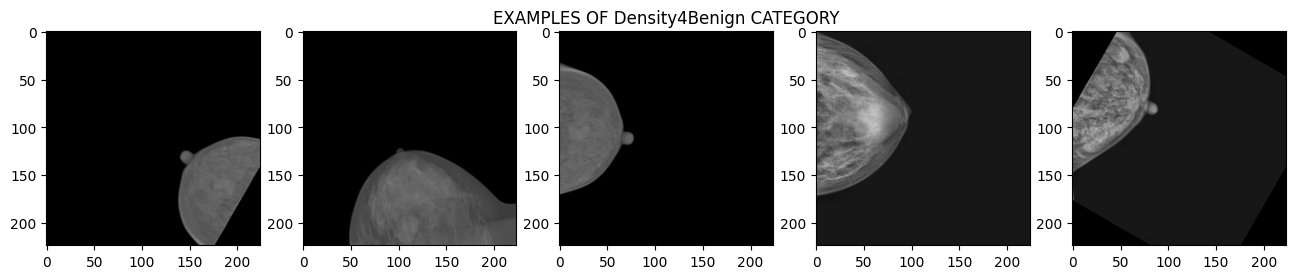

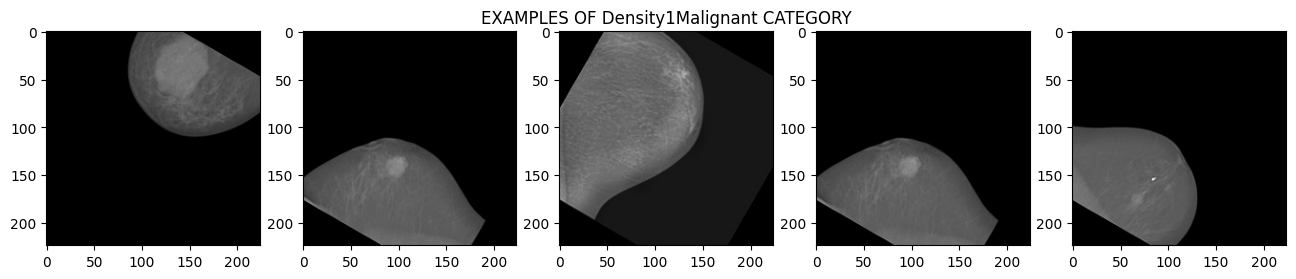

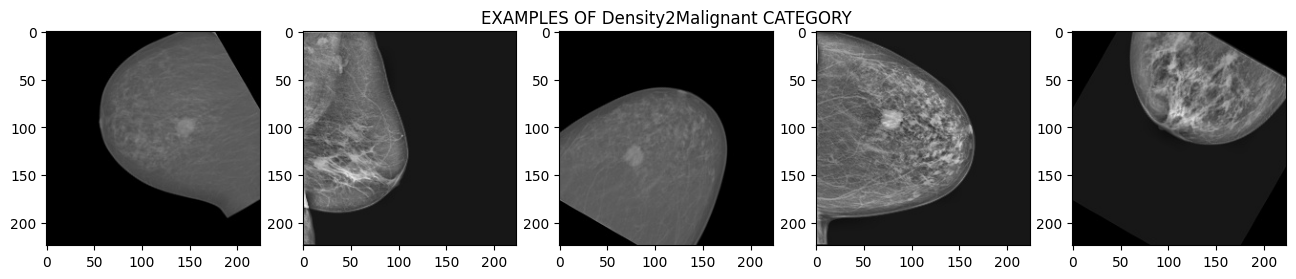

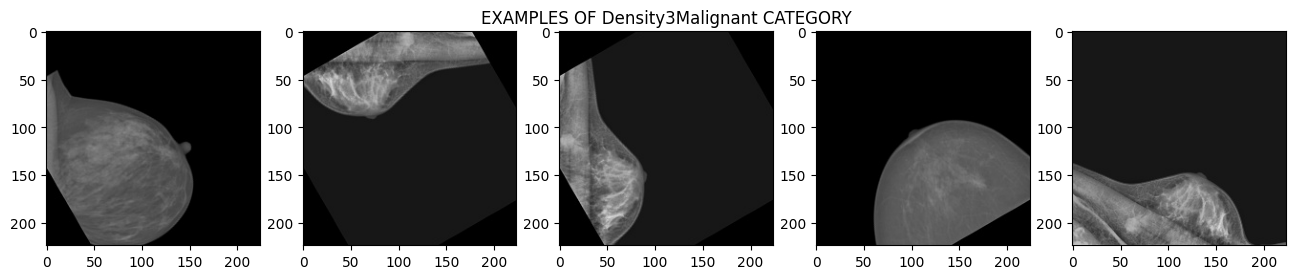

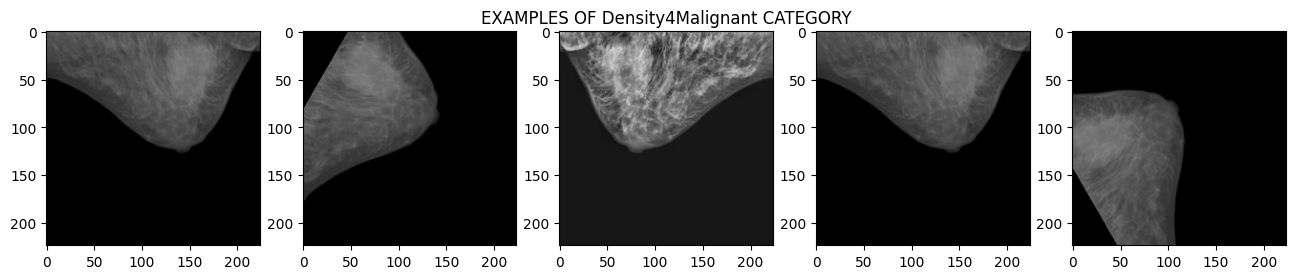

In [4]:
labels = ['Density1Benign','Density2Benign','Density3Benign','Density4Benign','Density1Malignant','Density2Malignant','Density3Malignant','Density4Malignant']
for i in range(len(labels)):
    image_str = train[train['label'] == labels[i]].head()
    plt.figure(i+2,figsize=(16,6))
    #plt.suptitle(f'Examples of {labels[i]}')
    j = 1
    for file in image_str['filename']:
        img = mpimg.imread('mammography_images/train/'+file)
        if j==4:
            plt.title(f'EXAMPLES OF {labels[i]} CATEGORY')
        plt.subplot(1,5,j)
        plt.imshow(img)
        j += 1


In [9]:
import cv2

Let's see how can we preproccess the images applying them some kernel/filters.

We will consider options like:

- Gaussian
- Mean
- Filter to increase the contrasts (Laplacian)

In [8]:
gaussian_kernel = np.array([[1.0/16.0,1.0/8.0,1.0/16.0],[1.0/8.0,1.0/4.0,1.0/8.0],[1.0/16.0,1.0/8.0,1.0/16.0]])
mean_kernel = np.array([[1.0/9.0,1.0/9.0,1.0/9.0],[1.0/9.0,1.0/9.0,1.0/9.0],[1.0/9.0,1.0/9.0,1.0/9.0]])
contrast_kernel = np.array([[-1,-1,-1],[-1,9,-1],[-1,-1,-1]])

In [10]:
def preprocess(image,kernel=contrast_kernel):
    im = cv2.filter2D(image, -1, kernel)
    #out2 = skimage.exposure.rescale_intensity(im, in_range=(150,200), out_range=(0,255))
    result=(cv2.normalize(im, (224,224),0, 255, cv2.NORM_MINMAX))
    return result

(224, 224, 3)


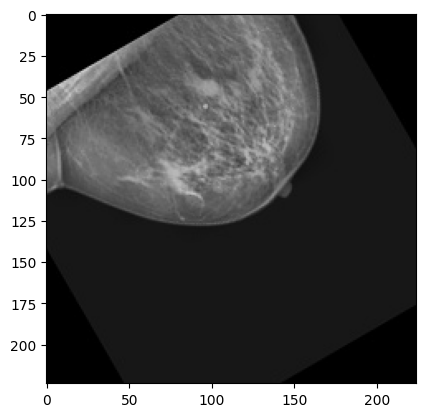

In [7]:
plt.figure(10)
example = train.loc[0,'filename']
img = mpimg.imread('mammography_images/train/'+example)
plt.imshow(img)
print(img.shape)


In [8]:
gaussian_example = preprocess(img,gaussian_kernel)
mean_example = preprocess(img,mean_kernel)
contrast_example = preprocess(img,contrast_kernel)

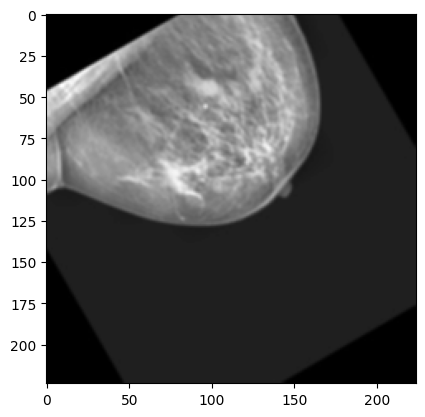

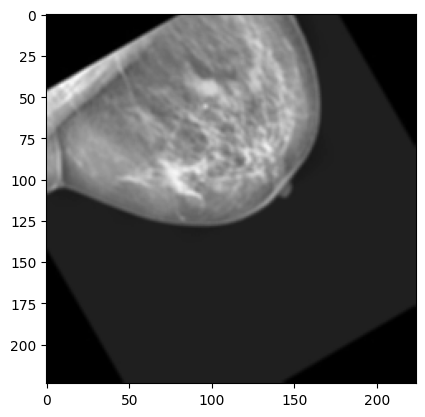

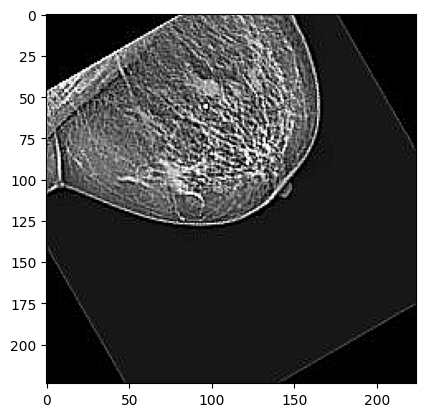

In [13]:
#Let's see the results
plt.figure(11)
plt.imshow(gaussian_example)
plt.figure(12)
plt.imshow(mean_example)
plt.figure(13)
plt.imshow(contrast_example)


We see that ur first two filters blurry a bit our image; but the third one (also known as Laplacian) increases contrast and makes some of the mammography aspects easier to see. Let's compare the original and the proccessed together.

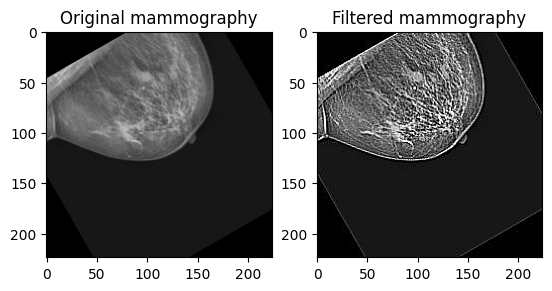

In [14]:
plt.figure(14)
plt.subplot(1,2,1)
plt.title('Original mammography')
plt.imshow(img)
plt.subplot(1,2,2)
plt.title('Filtered mammography')
plt.imshow(contrast_example)

In [11]:
import tensorflow as tf

In [12]:
datagen = tf.keras.preprocessing.image.ImageDataGenerator(rescale=1.0/255,preprocessing_function=preprocess)

In [13]:
from sklearn.model_selection import train_test_split

In [14]:
target = train['label']
X = train['filename']

X_train,X_val = train_test_split(train,stratify=train['label'],test_size=0.2)

In [27]:
small_X_train = X_train[:100]

In [13]:
X_train.head()

,filename,label
5588,Image_5589.jpg,Density2Malignant
3379,Image_3380.jpg,Density3Benign
1660,Image_1661.jpg,Density1Malignant
3948,Image_3949.jpg,Density3Benign
2408,Image_2409.jpg,Density1Malignant


In [14]:
X_val.head()

,filename,label
1823,Image_1824.jpg,Density2Malignant
3085,Image_3086.jpg,Density1Malignant
5064,Image_5065.jpg,Density2Malignant
3419,Image_3420.jpg,Density1Malignant
489,Image_490.jpg,Density1Malignant


Now we have to transform our images using the preprocess function we created some cells above.

In [15]:
X_train_gen = datagen.flow_from_dataframe(
dataframe = X_train,
directory = 'mammography_images/train',
x_col = 'filename',
y_col = 'label',
color_mode='rgb',
class_mode = 'categorical',
target_size = (224,224),
batch_size = 40,
seed = 50,
shuffle = True,
rotation_range=45,
zoom_range=1.0,
horizontal_flip=True,
vertical_flip=True
)

Found 4579 validated image filenames belonging to 8 classes.


In [16]:
label_map = (X_train_gen.class_indices)
print(label_map)

{'Density1Benign': 0, 'Density1Malignant': 1, 'Density2Benign': 2, 'Density2Malignant': 3, 'Density3Benign': 4, 'Density3Malignant': 5, 'Density4Benign': 6, 'Density4Malignant': 7}


In [17]:
X_val_gen = datagen.flow_from_dataframe(
dataframe = X_val,
directory = 'mammography_images/train',
x_col = 'filename',
y_col = 'label',
color_mode = 'rgb',
class_mode = 'categorical',
target_size = (224,224),
batch_size = 40,
seed = 50,
shuffle = False,
rotation_range=45,
zoom_range=1.0,
horizontal_flip=True,
vertical_flip=True
)

Found 1145 validated image filenames belonging to 8 classes.


In [18]:
test_datagen = tf.keras.preprocessing.image.ImageDataGenerator(rescale=1.0/255,preprocessing_function=preprocess)

In [19]:
X_test_gen = test_datagen.flow_from_dataframe(
dataframe = test,
directory = 'mammography_images/test',
x_col = 'filename',
y_col = None,
class_mode = None,
color_mode='rgb',
target_size = (224,224),
batch_size = 9, #This has to divide 1908 (len of test set) exactly.
seed = 50,
shuffle = False
)

Found 1908 validated image filenames.


We already have our images transformed with the Laplacian filter. We could also use ImageDataGenerator for Data Augmentation. Depending on the final precision and accuracy of our model we will try it or leave data as it is; as we have ~5000 images to train the model, which is not a lot.

In [20]:
from tensorflow.keras.layers import Dense, Flatten, Dropout,AveragePooling2D, Conv2D, MaxPooling2D, BatchNormalization
from tensorflow.keras.applications.resnet import ResNet50
from tensorflow.keras.initializers import RandomNormal, Zeros
#from tensorflow.keras.applications import InceptionV3,DenseNet201,EfficientNetB7, MobileNetV2,Xception,VGG16,NASNetMobile
#from keras.applications.inception_resnet_v2 import InceptionResNetV2
from tensorflow.keras.callbacks import ModelCheckpoint, EarlyStopping, ReduceLROnPlateau
from keras.models import Model
from keras.models import Sequential
from keras.regularizers import *
from tensorflow import keras
from tensorflow.keras import layers

(Acuérdate de borrar las no utilizadas, todas estas descargas vienen de un repositorio encontrado para entrenar una ConvNet)

Creamos nuestra arquitectura de CNN. Pondremos tres capas de convolución, seguidas de tres capas de MaxPooling para reducir la dimensionalidad. Después, una capa Flatten y dos Dense layers seguidas de una última softmax con 8 unidades; cada una de ellas representando la probabilidad de obtener cada clase.

In [19]:
model = keras.models.Sequential(
[
        Conv2D(64,(3,3),activation='relu',input_shape=(224,224,3),kernel_initializer='random_normal',bias_initializer='zeros',name='Convlayer1'),
        BatchNormalization(name='BatchNorm1'),
        MaxPooling2D((2,2),name='MaxPoollayer1'),
        Conv2D(64,(3,3),kernel_initializer='random_normal',bias_initializer='zeros',activation='relu',name='Convlayer2'),
        BatchNormalization(name='BatchNorm2'),
        MaxPooling2D((2,2),name='MaxPoollayer2'),
        Conv2D(32,(3,3),kernel_initializer='random_normal',bias_initializer='zeros',activation='relu',name='Convlayer3'),
        BatchNormalization(name='BatchNorm3'),
        MaxPooling2D((2,2),name='MaxPoollayer3'),
        Flatten(),
        Dense(units=80,kernel_initializer='random_normal',bias_initializer='zeros',name = 'Dense1'),
        Dropout(0.2),
        Dense(units=64,kernel_initializer='random_normal',bias_initializer='zeros',name = 'Dense2'),
        Dropout(0.2),
        Dense(units=8,kernel_initializer='random_normal',bias_initializer='zeros',activation='softmax',name='outputlayer'),
]
)

C:\Users\ijimc\AppData\Roaming\Python\Python310\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [20]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ Convlayer1 (Conv2D)             │ (None, 222, 222, 64)   │         1,792 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ BatchNorm1 (BatchNormalization) │ (None, 222, 222, 64)   │           256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ MaxPoollayer1 (MaxPooling2D)    │ (None, 111, 111, 64)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ Convlayer2 (Conv2D)             │ (None, 109, 109, 64)   │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ BatchNorm2 (BatchNormalization) │ (None, 109, 109, 64)   │           256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ MaxPoollayer2 (MaxPooling2D)    │ (None, 54, 54, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ Convlayer3 (Conv2D)             │ (None, 52, 52, 32)     │        18,464 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ BatchNorm3 (BatchNormalization) │ (None, 52, 52, 32)     │           128 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ MaxPoollayer3 (MaxPooling2D)    │ (None, 26, 26, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 21632)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ Dense1 (Dense)                  │ (None, 80)             │     1,730,640 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 80)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ Dense2 (Dense)                  │ (None, 64)             │         5,184 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ outputlayer (Dense)             │ (None, 8)              │           520 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 1,794,168 (6.84 MB)

 Trainable params: 1,793,848 (6.84 MB)

 Non-trainable params: 320 (1.25 KB)

We can see where all these parameters come from (weights and biases):

- For the first ConvLayer; we have a 3x3 filter for each channel (as it is an rgb image it has 3); and we want 64 different filters; each with 1 bias; so -> total parameters = 3x3x3x64 + 64 = 1792.
- The MaxPooling Layers, as well as Dropout layers do not have any parameter
- For BatchNormalization layers; we have 64 channels and 4 parameters for each -> 64x4 = 256. (Same for the second one and for the third one we get 32x4 = 128).
- For the second ConvLayer, we have 3x3 filters for each channel (we now have the 64 previous channels) and we want 64 different filters; so -> total parameters = 3x3x64x64 + 64 = 36928.
- For the third ConvLayer,  we have 3x3 filters for each channel (we now have the 64 previous channels) and we want 32 different filters; so -> total parameters = 3x3x64x32 + 32 = 18464.

- At this point (after the last Max Pool) we have 26x26x32 data; which with the Flatten layer end up being a 1D vector of 21632 numbers.

- For the 1st Dense layer, which has 80 units; we have 80x21632 + 80 = 1,730,640 parameters.
- For the 2nd Dense layer, which has 64 units; we have 64x80 + 64 = 5184 parameters.
- Lastly, for the 3rd and last layer, which has 8 units, we have 64x8 + 8 = 520 parameters.

In [20]:
callbacks = [
    #EarlyStopping(monitor='val_loss',patience=5,restore_best_weights=True),
    ReduceLROnPlateau(factor=0.3,monitor='val_loss',patience=3)
]

In [21]:
model.compile(optimizer=tf.keras.optimizers.SGD(clipvalue=0.5,learning_rate=0.003), loss = tf.keras.losses.CategoricalCrossentropy(),metrics=['accuracy','f1_score','precision','recall'])

In [22]:
history = model.fit(X_train_gen,validation_data=X_val_gen,epochs=45,callbacks=callbacks)

Epoch 1/45


C:\Users\ijimc\AppData\Roaming\Python\Python310\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:122: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


115/115 ━━━━━━━━━━━━━━━━━━━━ 317s 3s/step - accuracy: 0.2035 - f1_score: 0.1296 - loss: 2.5473 - precision: 0.2210 - recall: 0.0807 - val_accuracy: 0.0096 - val_f1_score: 0.0024 - val_loss: 2.2675 - val_precision: 0.0000e+00 - val_recall: 0.0000e+00 - learning_rate: 0.0030
Epoch 2/45
115/115 ━━━━━━━━━━━━━━━━━━━━ 316s 3s/step - accuracy: 0.2640 - f1_score: 0.1568 - loss: 1.8918 - precision: 0.3435 - recall: 0.0429 - val_accuracy: 0.0489 - val_f1_score: 0.0180 - val_loss: 2.1325 - val_precision: 0.0000e+00 - val_recall: 0.0000e+00 - learning_rate: 0.0030
Epoch 3/45
115/115 ━━━━━━━━━━━━━━━━━━━━ 317s 3s/step - accuracy: 0.3047 - f1_score: 0.1747 - loss: 1.7589 - precision: 0.4761 - recall: 0.0515 - val_accuracy: 0.1694 - val_f1_score: 0.0763 - val_loss: 1.9768 - val_precision: 0.0000e+00 - val_recall: 0.0000e+00 - learning_rate: 0.0030
Epoch 4/45
115/115 ━━━━━━━━━━━━━━━━━━━━ 317s 3s/step - accuracy: 0.2995 - f1_score: 0.1837 - loss: 1.7327 - precision: 0.3844 - recall: 0.0340 - val_accurac

In [26]:
#Guardamos el intento chulo.
first_try_data = {'loss':history.history['loss'],'val_loss':history.history['val_loss'],'precision':history.history['precision'],'val_precision':history.history['val_precision'],'recall':history.history['recall'],'val_recall':history.history['val_recall'],'accuracy':history.history['accuracy'],'val_accuracy':history.history['val_accuracy']}
first_try_df = pd.DataFrame(data=first_try_data)
first_try_df.to_csv('45epoch_lr0.003.csv')

In [33]:
model.save('model_45epochs_lr_3e-3.keras')

In [21]:
results = pd.read_csv('45epoch_lr0.003.csv')
results.head()

,epoch,loss,val_loss,precision,val_precision,recall,val_recall,accuracy,val_accuracy
0,0,2.244466,2.267514,0.243067,0.0,0.065080,0.000000,0.222319,0.009607
1,1,1.866963,2.132493,0.351648,0.0,0.041931,0.000000,0.277572,0.048908
2,2,1.763509,1.976845,0.445629,0.0,0.045643,0.000000,0.305744,0.169432
3,3,1.722623,1.812160,0.430952,0.0,0.039528,0.000000,0.308583,0.309170
4,4,1.686790,1.729155,0.443182,1.0,0.042586,0.000873,0.335444,0.342358


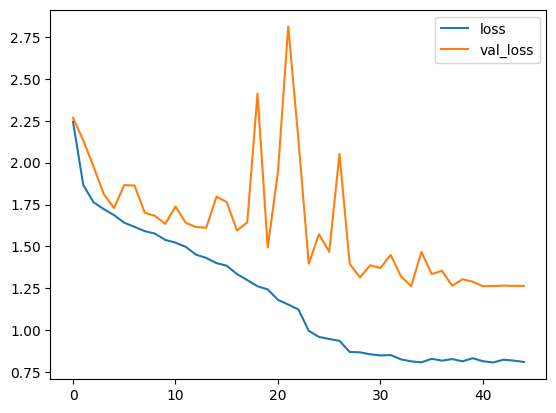

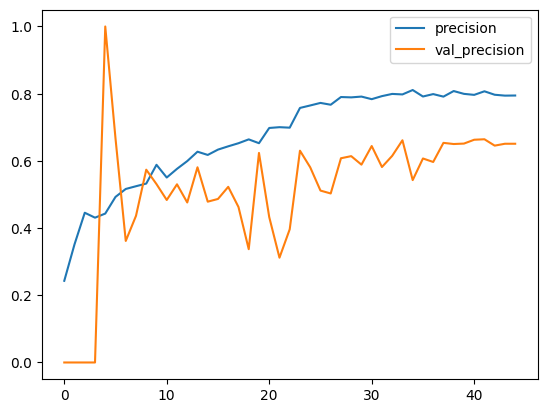

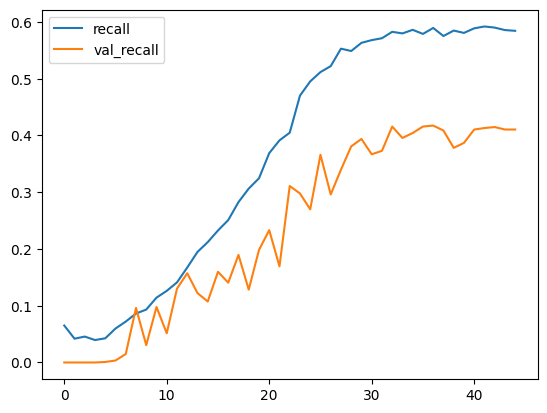

In [32]:
plt.figure()
plt.plot(results['loss'],label='loss')
plt.plot(results['val_loss'],label='val_loss')
plt.legend()
plt.figure()
plt.plot(results['precision'],label='precision')
plt.plot(results['val_precision'],label='val_precision')
plt.legend()
plt.figure()
plt.plot(results['recall'],label='recall')
plt.plot(results['val_recall'],label='val_recall')
plt.legend()

In [22]:
loaded_model = tf.keras.models.load_model('model_45epochs_lr_3e-3.keras')

In [23]:
pred = loaded_model.predict(X_val_gen)

C:\Users\ijimc\AppData\Roaming\Python\Python310\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:122: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


29/29 ━━━━━━━━━━━━━━━━━━━━ 15s 482ms/step


In [27]:
X_val['label'][10:20]

2556    Density3Malignant
1389       Density2Benign
3036    Density1Malignant
354     Density1Malignant
2113       Density1Benign
4364    Density3Malignant
1285       Density1Benign
5132    Density1Malignant
2458    Density1Malignant
4725    Density2Malignant
Name: label, dtype: object

In [26]:
num_pred = pred.argmax(axis=-1)
print(num_pred[10:20])
print(label_map)

[5 2 1 1 0 5 0 1 1 3]
{'Density1Benign': 0, 'Density1Malignant': 1, 'Density2Benign': 2, 'Density2Malignant': 3, 'Density3Benign': 4, 'Density3Malignant': 5, 'Density4Benign': 6, 'Density4Malignant': 7}


Let's create a function that calculates precision, recall, accuracy and f1_score for each of the categories; as the overall keras function is not accurate when doing multiclass classification.

Remeber that:

Accuracy = (TP + TN)/All -> (percentage of correctly classified examples)  
Precision = TP/(TP+FP) -> (percentage of positives that were correctly classified)  
Recall = TP/(TP+FN) -> (percentage of real positives caught)  
F1-score = 2*P*R/(P+R) (P:precision, R:recall)

In [30]:
def singular_metrics(y_true,y_pred,label):
    #label is a LIST of the labels wanted to use
    number = [label_map[single_label] for single_label in label]
    TP = 0.0
    TN = 0.0
    FN = 0.0
    FP = 0.0
    for i in range(len(y_true)):
        true_num = label_map[y_true[i]]
        if true_num == y_pred[i]:
            if true_num in number:
                TP += 1
            else:
                TN += 1
        else:
            if true_num not in number and y_pred[i] not in number:
                TN += 1
            elif true_num in number:
                FN += 1
            else:
                FP += 1
    
    if TP+FP <1:
        precision = 0.0
    else:
        precision = TP/(TP + FP)

    if TP+FN <1:
        recall = 0.0
    else:
        recall = TP/(TP+FN)
    
    if precision+recall == 0.0:
        f1_score = 0.0
    else:
        f1_score = 2*precision*recall/(precision+recall)

    accuracy = (TP +TN)/len(y_pred)
    

    results = {'accuracy':accuracy,'precision':precision,'recall':recall,'f1_score':f1_score}
    return results

Now let's calculate the specific metrics for each type of tumor

{'accuracy': 0.9266375545851528, 'precision': 0.7804878048780488, 'recall': 0.49230769230769234, 'f1_score': 0.6037735849056605}
{'accuracy': 0.9921397379912664, 'precision': 0.9473684210526315, 'recall': 0.8372093023255814, 'f1_score': 0.8888888888888888}
{'accuracy': 0.9240174672489083, 'precision': 0.7523809523809524, 'recall': 0.5642857142857143, 'f1_score': 0.6448979591836734}
{'accuracy': 0.965938864628821, 'precision': 0.7241379310344828, 'recall': 0.6461538461538462, 'f1_score': 0.6829268292682927}
{'accuracy': 0.8524017467248908, 'precision': 0.6952141057934509, 'recall': 0.8518518518518519, 'f1_score': 0.7656033287101248}
{'accuracy': 0.8838427947598253, 'precision': 0.7709923664122137, 'recall': 0.8757225433526011, 'f1_score': 0.8200270635994588}
{'accuracy': 0.9685589519650655, 'precision': 0.8787878787878788, 'recall': 0.6744186046511628, 'f1_score': 0.7631578947368421}
{'accuracy': 0.9956331877729258, 'precision': 1.0, 'recall': 0.5454545454545454, 'f1_score': 0.705882352

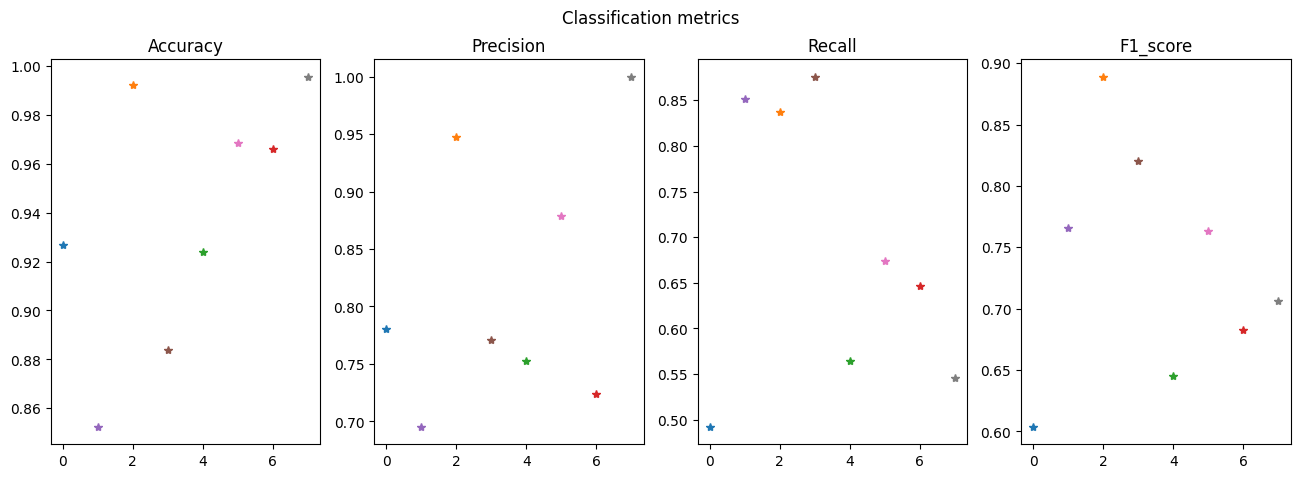

In [31]:
plt.figure(figsize=(16,5))
plt.suptitle('Classification metrics')

for label in labels:
    metrics = singular_metrics(list(X_val['label']),num_pred,[label])
    print(metrics)
    plt.subplot(1,4,1)
    plt.title('Accuracy')
    plt.plot(label_map[label],metrics['accuracy'],'*')
    plt.subplot(1,4,2)
    plt.title('Precision')
    plt.plot(label_map[label],metrics['precision'],'*')
    plt.subplot(1,4,3)
    plt.title('Recall')
    plt.plot(label_map[label],metrics['recall'],'*')
    plt.subplot(1,4,4)
    plt.title('F1_score')
    plt.plot(label_map[label],metrics['f1_score'],'*')
    
print(label_map)

{'accuracy': 0.8227074235807861, 'precision': 0.8277153558052435, 'recall': 0.5846560846560847, 'f1_score': 0.6852713178294574}
{'accuracy': 0.7685589519650655, 'precision': 0.8201530612244898, 'recall': 0.8383311603650587, 'f1_score': 0.8291424887169568}


([<matplotlib.axis.XTick at 0x2184946be50>,
 [Text(0, 0, 'Benign'), Text(1, 0, 'Malignant')])

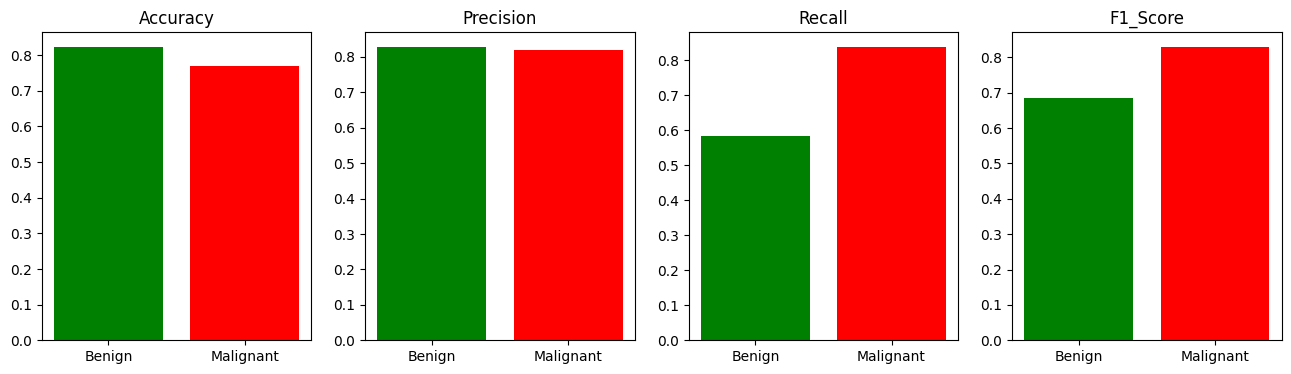

In [39]:
benign = ['Density1Benign','Density2Benign','Density3Benign','Density4Benign']
malignant = ['Density1Malignant','Density2Malignant','Density3Malignant','Density4Malignant']

ben_metrics = singular_metrics(list(X_val['label']),num_pred,benign)
mal_metrics = singular_metrics(list(X_val['label']),num_pred,malignant)

print(ben_metrics)
print(mal_metrics)

plt.figure(figsize=(16,4))

plt.subplot(1,4,1)
plt.title('Accuracy')
plt.bar(0,ben_metrics['accuracy'],color='g')
plt.bar(1,mal_metrics['accuracy'],color='r')
plt.xticks([0,1],['Benign','Malignant'])

plt.subplot(1,4,2)
plt.title('Precision')
plt.bar(0,ben_metrics['precision'],color='g')
plt.bar(1,mal_metrics['precision'],color='r')
plt.xticks([0,1],['Benign','Malignant'])

plt.subplot(1,4,3)
plt.title('Recall')
plt.bar(0,ben_metrics['recall'],color='g')
plt.bar(1,mal_metrics['recall'],color='r')
plt.xticks([0,1],['Benign','Malignant'])

plt.subplot(1,4,4)
plt.title('F1_Score')
plt.bar(0,ben_metrics['f1_score'],color='g')
plt.bar(1,mal_metrics['f1_score'],color='r')
plt.xticks([0,1],['Benign','Malignant'])

In [40]:
test_pred = loaded_model.predict(X_test_gen)

C:\Users\ijimc\AppData\Roaming\Python\Python310\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:122: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


212/212 ━━━━━━━━━━━━━━━━━━━━ 42s 199ms/step


In [41]:
test_num_pred = test_pred.argmax(axis=-1)

In [49]:
label_inverse_map = {
    0: 'Density1Benign',
    1:'Density1Malignant',
    2:'Density2Benign',
    3:'Density2Malignant',
    4:'Density3Benign',
    5:'Density3Malignant',
    6:'Density4Benign',
    7:'Density4Malignant'
}

In [50]:
test_predictions = list(test_num_pred)
test_predictions_labels = list(map(label_inverse_map.get, test_predictions))

In [54]:
from collections import Counter

In [55]:
Counter(test_predictions_labels)

Counter({'Density3Benign': 152,
         'Density1Benign': 150,
         'Density2Malignant': 628,
         'Density1Malignant': 738,
         'Density3Malignant': 92,
         'Density4Benign': 88,
         'Density2Benign': 56,
         'Density4Malignant': 4})

We see that the distribution for test classification follows the same one as in the training set.